In [3]:
import pandas as pd
import numpy as np

import matplotlib ; import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [4]:
df_raw = pd.read_csv("rawdata/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [6]:
df_raw_x = df_raw.drop(["EVAL"], axis = 1)
df_raw_y = df_raw["EVAL"]

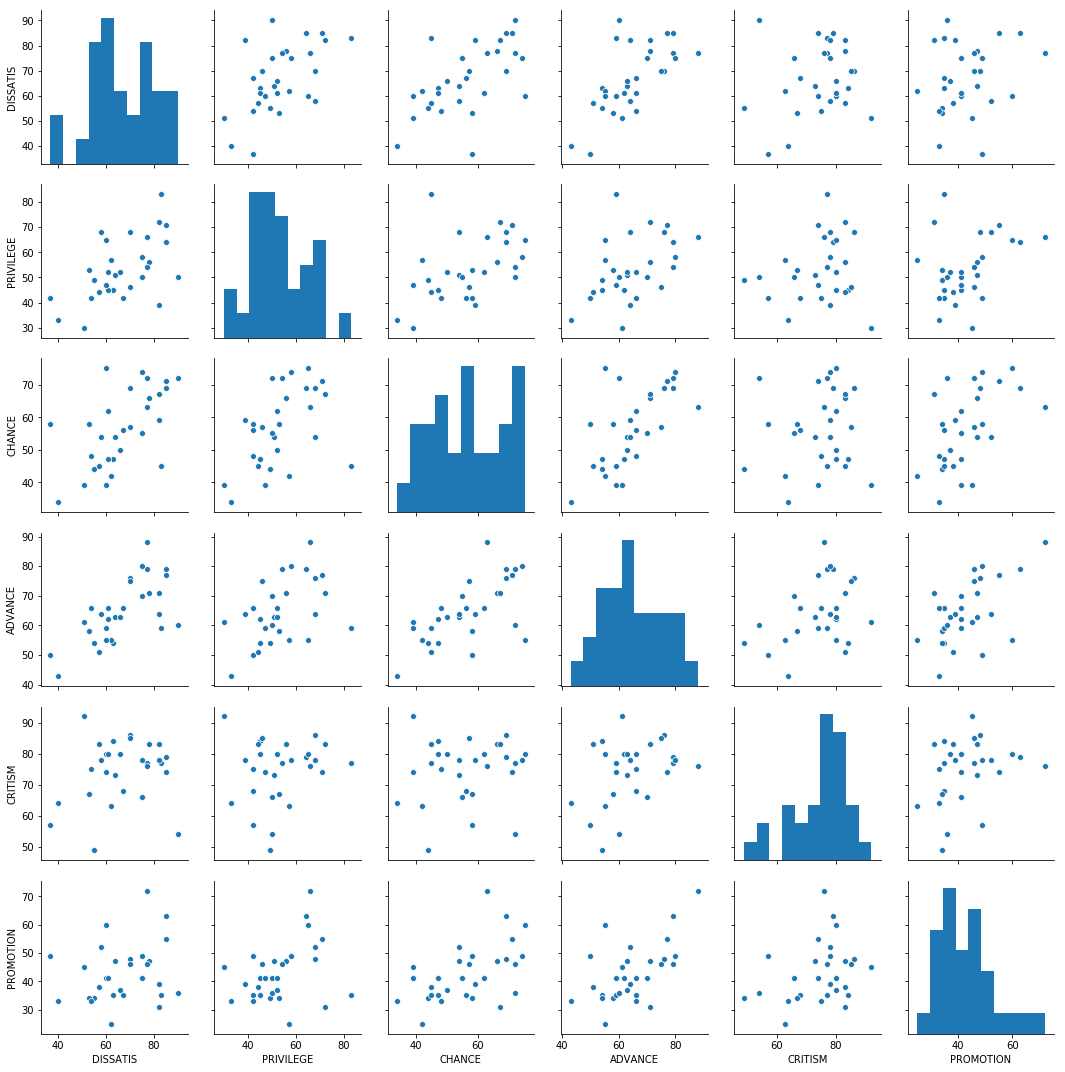

In [7]:
sns.pairplot(df_raw_x)

In [8]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [9]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [10]:
x_cols = df_raw_x.columns

In [11]:
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data: ")
print(nd_scaled[:5].round(3))
print("Shape: {}".format(nd_scaled.shape))

Scaled Data: 
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape: (30, 6)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [18]:
pca = PCA(n_components = len(df_raw_x.columns))
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data: ")
print(nd_pca[:5].round(3))
print("Shape: {}".format(nd_pca.shape))

PCA Data: 
[[ 1.676 -2.739 -0.128 -0.503  0.243  0.226]
 [ 0.218 -0.126  0.431  0.087  0.196  0.194]
 [-2.105 -0.515 -0.277  0.491 -0.447 -0.632]
 [ 1.36  -0.861 -0.918  0.032 -0.401  0.441]
 [-1.512 -0.353 -0.327 -0.329 -0.327  0.212]]
Shape: (30, 6)


In [25]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin" + str(i) for i in range (1,7)])

In [28]:
df_sclaed_pca = df_scaled.join(df_pca)
df_sclaed_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [37]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [l for l in range(1, 7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


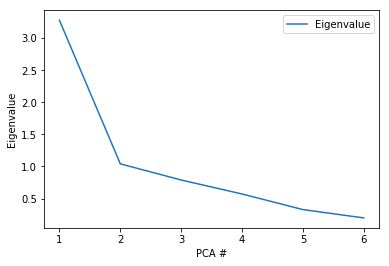

In [34]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "Eigenvalue")
plt.ylabel("Eigenvalue")
plt.xlabel("PCA #")
plt.legend(loc="best")

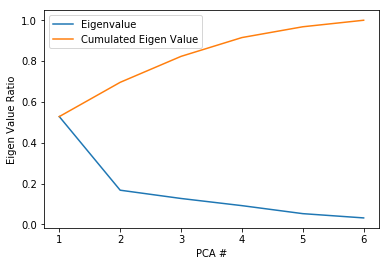

In [38]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label = "Eigenvalue")

# Drawing Cumulated Ratio graph
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label = "Cumulated Eigen Value")
plt.ylabel("Eigen Value Ratio")
plt.xlabel("PCA #")
plt.legend(loc="best")

In [43]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, \
                                                columns = ["Prin" + str(i) for i in range (1,7)])], axis = 1)

df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


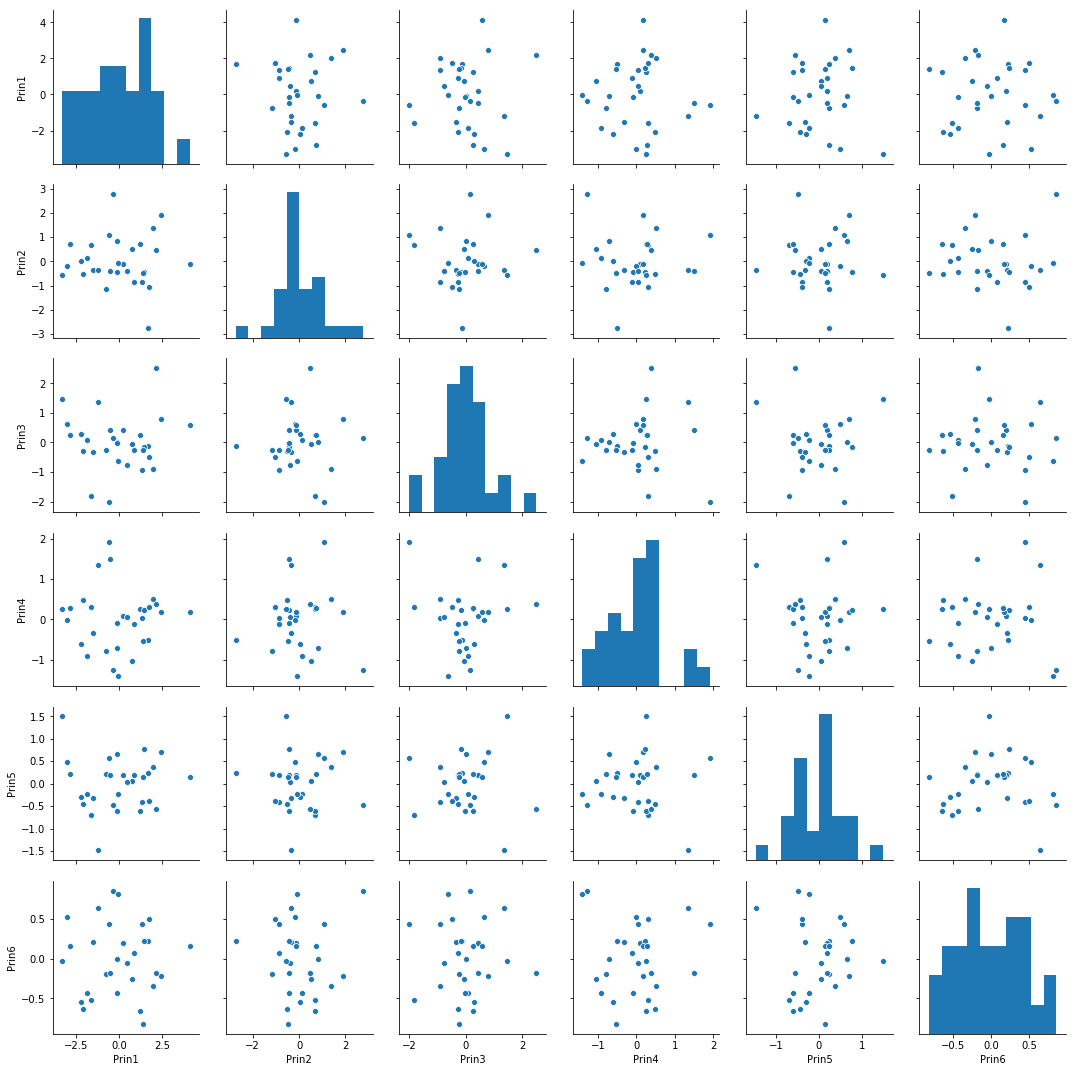

In [44]:
sns.pairplot(df_pca)

In [45]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


In [50]:
# 원데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
df_raw_x_const.head()
# const 기본값 1 주는 건가
# 왜 주는 거지...?

,const,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,1.0,51,30,39,61,92,45
1,1.0,64,51,54,63,73,47
2,1.0,70,68,69,76,86,48
3,1.0,63,45,47,54,84,35
4,1.0,78,56,66,71,83,47


In [49]:
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.24e-05
Time:                        10:48:33   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [51]:
x_var = ["Prin" + str(i) for i in range (1, 4)]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.02e-05
Time:                        10:50:21   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0